In [1]:
import os
import torch
from IPython.display import Image, clear_output
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 2.3.1+cu121 _CudaDeviceProperties(name='NVIDIA GeForce RTX 4090', major=8, minor=9, total_memory=24563MB, multi_processor_count=128)


In [ ]:
#Running the cell below pulls the YOLOv3 model from roboflow's github
!git clone https://github.com/roboflow-ai/yolov3

In [1]:
import zipfile
import os
#Running pulls dataset from roboflow 
!curl -L https://public.roboflow.com/ds/wG1OCiLVvc?key=NPicXpeemp > roboflow.zip 

with zipfile.ZipFile("roboflow.zip",'r') as zip_ref:
    zip_ref.extractall(os.getcwd())

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   904  100   904    0     0   2207      0 --:--:-- --:--:-- --:--:--  2221

  3  592M    3 19.5M    0     0  17.4M      0  0:00:33  0:00:01  0:00:32 17.4M
 17  592M   17  103M    0     0  48.7M      0  0:00:12  0:00:02  0:00:10 83.6M
 33  592M   33  196M    0     0  63.0M      0  0:00:09  0:00:03  0:00:06 88.4M
 47  592M   47  281M    0     0  68.3M      0  0:00:08  0:00:04  0:00:04 87.3M
 66  592M   66  391M    0     0  76.5M      0  0:00:07  0:00:05  0:00:02 93.0M
 84  592M   84  501M    0     0  81.8M      0  0:00:07  0:00:06  0:00:01 96.2M
 97  592M   97  578M    0     0  81.3M      0  0:00:07  0:00:07 --:--:-- 95.1M
100  592M  100  592M    0     0  81.4M      0  0:0

In [ ]:
# Formats file paths according to convetions used by off-the-shelf model
import os
import shutil
import glob
root = "C:/Users/gymso/Desktop/V1(Solo)/YOLOv3/yolov3"

os.chdir(root)

os.chdir("train")
os.makedirs("labels", exist_ok=True)
os.makedirs("images", exist_ok=True)

# Move JPGs
for file in glob.glob("*.jpg"):
    shutil.move(file, "images/")

# Move TXT files (labels)
for file in glob.glob("*.txt"):
    shutil.move(file, "labels/")

os.chdir("images")

# create Ultralytics specific text file of training images
with open("train_images_roboflow.txt", "w") as f:
    for filename in os.listdir("."):
        f.write(f"{root}/train/images/{filename}\n")

os.chdir(root)
os.chdir("valid")

os.makedirs("labels", exist_ok=True)
os.makedirs("images", exist_ok=True)

# Move JPGs
for file in glob.glob("*.jpg"):
    shutil.move(file, "images/")

# Move TXT files (labels)
for file in glob.glob("*.txt"):
    shutil.move(file, "labels/")

os.chdir("images")

# create Ultralytics specific text file of validation images
with open("valid_images_roboflow.txt", "w") as f:
    for filename in os.listdir("."):
        f.write(f"{root}/valid/images/{filename}\n")

# Done
os.chdir(root)

In [ ]:
print(os.getcwd())

C:\Users\gymso\Desktop\V1(Solo)\YOLOv3 (Using ultralytics)\yolov3


In [ ]:
import os
import shutil
import re

# Define root and working paths
root = "C:/Users/gymso/Desktop/V1(Solo)/YOLOv3/yolov3"
data_dir = os.path.join(root, "data")
train_dir = os.path.join(root, "train")
labels_file = os.path.join(train_dir, "_darknet.labels")
names_file = os.path.join(train_dir, "roboflow_data.names")
data_file = os.path.join(data_dir, "roboflow.data")

# Change working directory to data_dir
os.chdir(data_dir)

# Display contents of labels file
print("\nContents of _darknet.labels:")
with open(labels_file, "r") as f:
    print(f.read())

# Copy _darknet.labels to roboflow_data.names
shutil.copy(labels_file, names_file)

# Count number of classes
def get_num_classes(labels_file_path):
    with open(labels_file_path, 'r') as f:
        return sum(1 for _ in f)

num_classes = get_num_classes(labels_file)
print(f"\nNumber of classes: {num_classes}")

# Modify roboflow.data with correct class count
with open(data_file, "r") as f:
    content = f.read()

# Replace existing `classes=` line
updated = re.sub(r"classes=\d+", f"classes={num_classes}", content)

# Write back the updated file
with open(data_file, "w") as f:
    f.write(updated)

# Display updated roboflow.data
print("\nUpdated roboflow.data:")
with open(data_file, "r") as f:
    print(f.read())


Contents of _darknet.labels:
aeroplane
bicycle
bird
boat
bottle
bus
car
cat
chair
cow
diningtable
dog
horse
motorbike
person
pottedplant
sheep
sofa
train
tvmonitor

Number of classes: 20

Updated roboflow.data:
classes=20
train= C:/Users/gymso/Desktop/V1(Solo)/YOLOv3 (Using ultralytics)/yolov3/train/images/train_images_roboflow.txt
valid= C:/Users/gymso/Desktop/V1(Solo)/YOLOv3 (Using ultralytics)/yolov3/valid/images/valid_images_roboflow.txt
names= C:/Users/gymso/Desktop/V1(Solo)/YOLOv3 (Using ultralytics)/yolov3/train/roboflow_data.names



In [ ]:
# Model Training
import torch

root = "C:/Users/gymso/Desktop/V1(Solo)/YOLOv3/yolov3"

os.chdir(root)
!python train.py --data data/roboflow.data --epochs 3

In [ ]:
# Plot of performance metrics over epochs
from utils import utils; utils.plot_results()

In [6]:
# Inference and Classification
root = "C:/Users/gymso/Desktop/V1(Solo)/YOLOv3/yolov3"

os.chdir(root)

!python detect.py --weights weights/last.pt --source test_images --names train/roboflow_data.names

Namespace(cfg='cfg/yolov3-spp.cfg', names='train/roboflow_data.names', weights='weights/last.pt', source='test_images', output='output', img_size=416, conf_thres=0.3, iou_thres=0.6, fourcc='mp4v', half=False, device='', view_img=False, save_txt=False, classes=None, agnostic_nms=False)
Using CUDA device0 _CudaDeviceProperties(name='NVIDIA GeForce RTX 4090', total_memory=24563MB)

Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
image 1/12 test_images\beach_people.png: 256x416 2 persons, Done. (0.346s)
image 2/12 test_images\cat.png: 288x416 1 cats, Done. (0.116s)
image 3/12 test_images\dog.png: 288x416 1 dogs, Done. (0.022s)
image 4/12 test_images\doggy.png: 288x416 3 dogs, Done. (0.026s)
image 5/12 test_images\family.png: 288x416 1 dogs, 2 persons, Done. (0.022s)
image 6/12 test_images\hibachi.jpg: 416x416 3 chairs, 5 persons, Done. (0.093s)
image 7/12 test_images\horse.png: 320x416 1 horses, Done. (0.084s)
image 8/12 test_images\people.jpg: 288x416 1 chairs, 1 

c:\Users\gymso\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3588.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


person_on_bike.png


C:\Users\gymso\AppData\Local\Temp\ipykernel_25844\1152268098.py:20: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  return np.fromstring(im.tobytes(), dtype='uint8').reshape((im.size[1], im.size[0], 3))


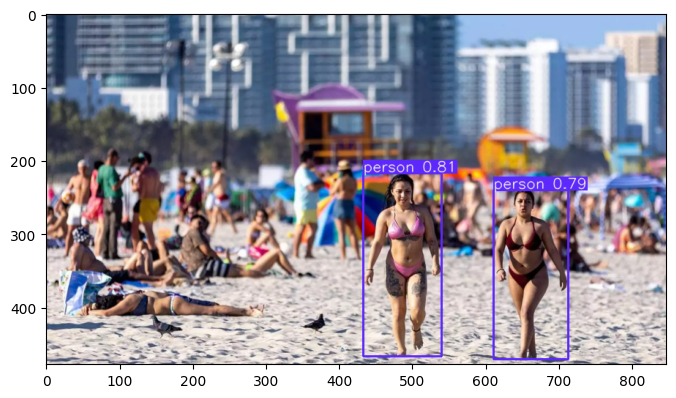

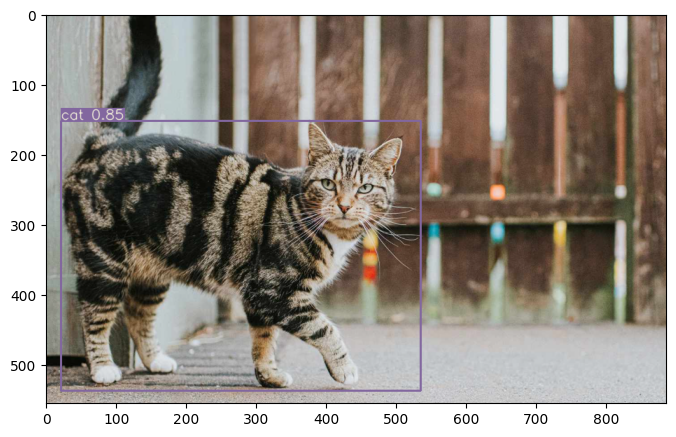

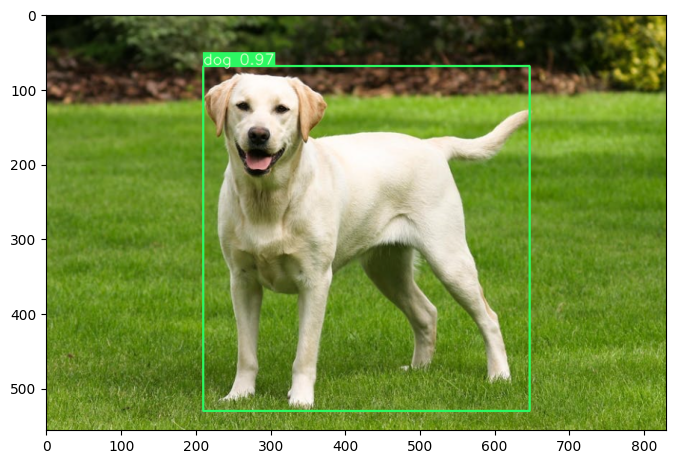

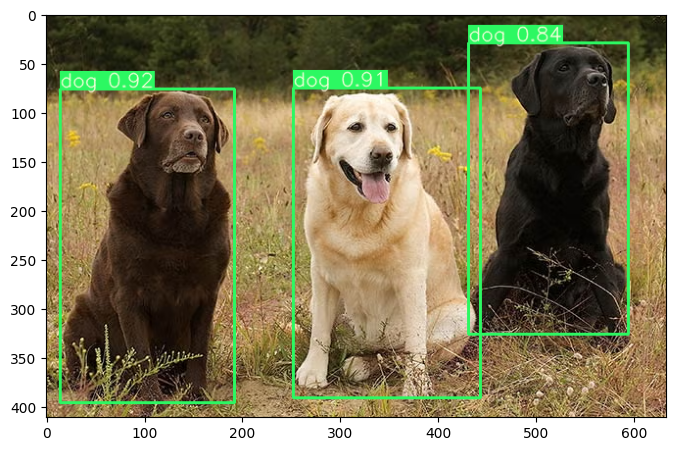

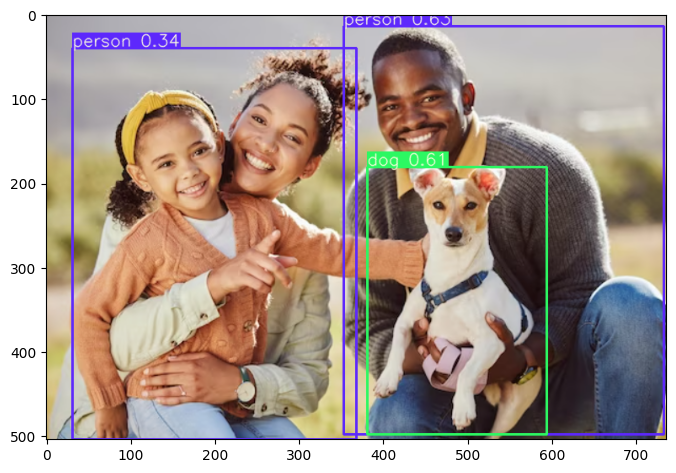

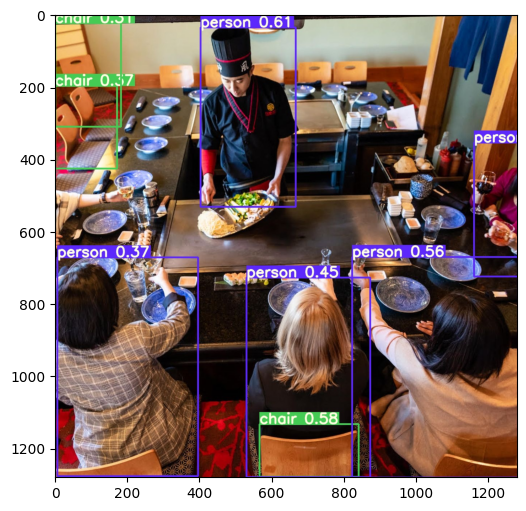

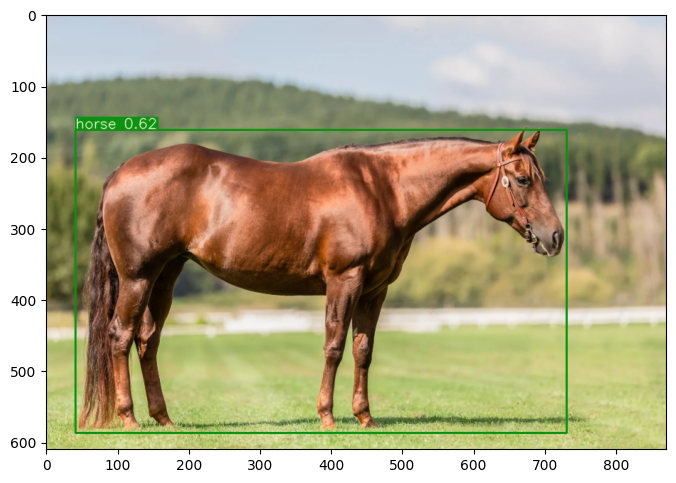

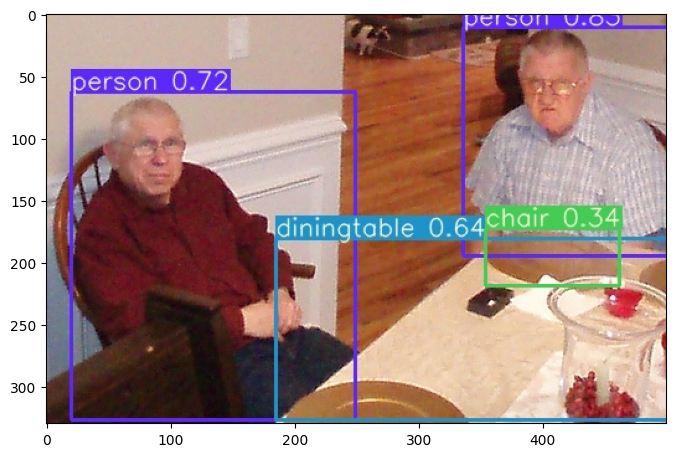

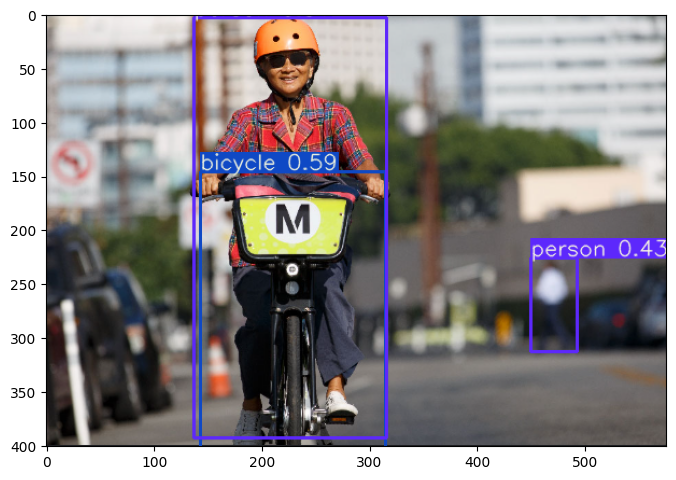

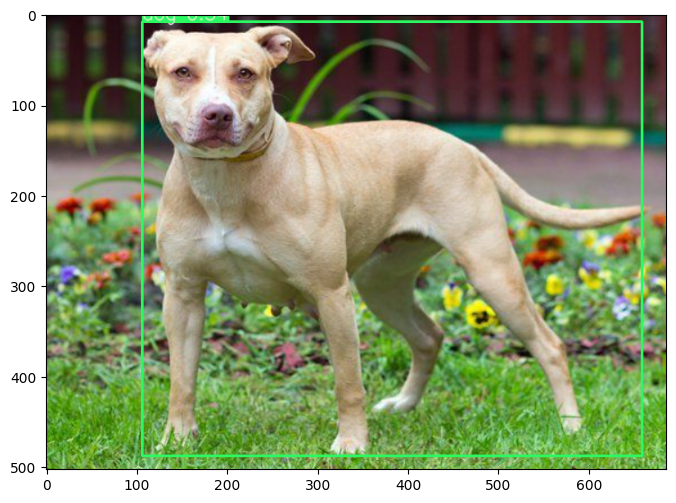

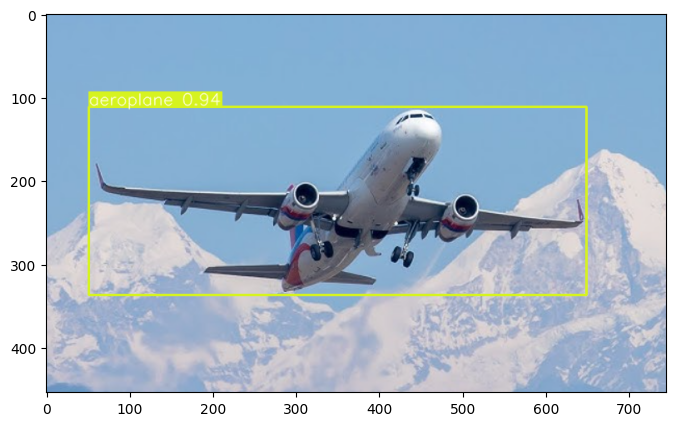

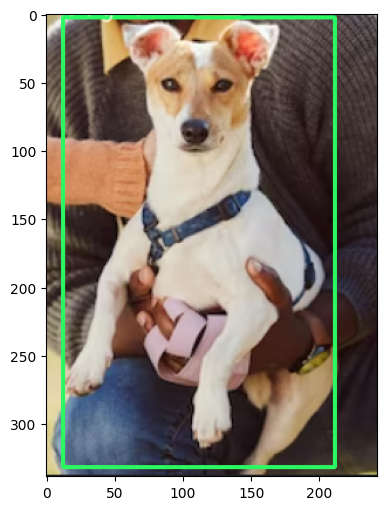

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Image
from glob import glob
import random
import PIL

# plot just one random image prediction
filename = random.choice(os.listdir('./output'))
print(filename)
Image('./output/' + filename)

# grab all images from our output directory
images = [ PIL.Image.open(f) for f in glob('./output/*') ]

# convert images to numPy
def img2array(im):
    if im.mode != 'RGB':
        im = im.convert(mode='RGB')
    return np.fromstring(im.tobytes(), dtype='uint8').reshape((im.size[1], im.size[0], 3))

# create array of numPy images
np_images = [ img2array(im) for im in images ]

# plot ALL results in test directory (NOTE: adjust figsize as you please)
for img in np_images:
    plt.figure(figsize=(8, 6))
    plt.imshow(img)